In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime # Alternative to Datetime64[ns] with more options to process time.
from datetime import date
import calendar

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


from numpy import mean
from numpy import std

plt.rcParams['figure.dpi'] = 100   # Setting the resolution of the plots we get.
plt.rcParams['savefig.dpi'] = 100

In [66]:
# Import CSV

load_csv = pd.read_csv("2012-capitalbikeshare-tripdata\combined_csv.csv")


In [67]:
bike_copy = load_csv.copy(deep=False)



In [68]:
# check for how many NaN(written value) we have

bike_copy.isna().sum()

Duration                0
Start date              0
End date                0
Start station number    0
Start station           0
End station number      0
End station             0
Bike number             0
Member type             0
dtype: int64

In [69]:
#bike_copy.Member type(because of the gap inbetween wont work)
bike_copy['Member type']

0          Member
1          Casual
2          Member
3          Member
4          Casual
            ...  
3255673    Casual
3255674    Member
3255675    Member
3255676    Member
3255677    Member
Name: Member type, Length: 3255678, dtype: object

In [70]:
bike_copy['Member type'].unique()

array(['Member', 'Casual', 'Unknown'], dtype=object)

In [71]:
bike_copy['Member type'].nunique()

3

In [72]:

bike_copy["Member type"].value_counts()

Member     2636066
Casual      619591
Unknown         21
Name: Member type, dtype: int64

In [73]:
bike_copy=bike_copy.loc[(bike_copy["Member type"] != "Unknown") ]

In [74]:
bike_copy[bike_copy.duplicated(["Start date", "End date",'Start station','End station'], keep=False)]

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
44975,1745,2011-02-06 12:10:21,2011-02-06 12:39:26,31214,17th & Corcoran St NW,31214,17th & Corcoran St NW,W00309,Member
44976,1744,2011-02-06 12:10:21,2011-02-06 12:39:26,31214,17th & Corcoran St NW,31214,17th & Corcoran St NW,W00599,Member
52893,2304,2011-02-11 09:27:35,2011-02-11 10:06:00,31304,36th & Calvert St NW / Glover Park,31237,25th St & Pennsylvania Ave NW,W00464,Casual
52894,2305,2011-02-11 09:27:35,2011-02-11 10:06:00,31304,36th & Calvert St NW / Glover Park,31237,25th St & Pennsylvania Ave NW,W00595,Casual
56525,569,2011-02-13 15:18:26,2011-02-13 15:27:55,31228,8th & H St NW,31203,14th & Rhode Island Ave NW,W00320,Member
...,...,...,...,...,...,...,...,...,...
3240297,1271,2012-12-22 18:32:37,2012-12-22 18:53:49,31609,Maine Ave & 7th St SW,31628,1st & K St SE,W01036,Member
3240956,502,2012-12-23 11:27:51,2012-12-23 11:36:13,31600,5th & K St NW,31203,14th & Rhode Island Ave NW,w00527,Member
3240957,502,2012-12-23 11:27:51,2012-12-23 11:36:13,31600,5th & K St NW,31203,14th & Rhode Island Ave NW,W20077,Member
3249169,652,2012-12-28 17:49:19,2012-12-28 18:00:12,31224,19th & L St NW,31116,California St & Florida Ave NW,W00760,Member


In [75]:
bike_copy.drop_duplicates(subset=["Start date", "End date",'Start station','End station'],inplace=True,ignore_index=True)


In [76]:
bike_copy["Year"]=pd.DatetimeIndex(bike_copy['Start date']).year
bike_copy["Month"]=pd.DatetimeIndex(bike_copy['Start date']).month
bike_copy["Day"]=pd.DatetimeIndex(bike_copy['Start date']).day
bike_copy["Weekday"]=pd.DatetimeIndex(bike_copy['Start date']).weekday


In [77]:
round(bike_copy.Duration/60,2)

0           59.13
1            5.77
2            9.37
3            7.23
4            3.88
            ...  
3255364    143.83
3255365      6.97
3255366      6.40
3255367      7.47
3255368      4.18
Name: Duration, Length: 3255369, dtype: float64

In [78]:
bike_copy.Duration=round(bike_copy.Duration/60,2)


In [79]:
bike_copy["Start date"] = pd.to_datetime(bike_copy["Start date"],dayfirst=True,yearfirst =False)

In [80]:
bike_copy=bike_copy.loc[(bike_copy["Duration"] >3) ]

In [81]:
bike_copy.reset_index(inplace=True,drop=True)

In [82]:
#bike_copy['Weekday'] = bike_copy['Weekday'].map({0 : 'Mon', 1 : 'Tue', 2 : 'Wed', 3 : 'Thu',
#4 : 'Fri', 5 : 'Sat', 6 : 'Sun'})
#bike_copy['Weekday'] = pd.Categorical(bike_copy['Weekday'], ordered=True)

In [83]:
bike_copy

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,Year,Month,Day,Weekday
0,59.13,2011-01-01 00:01:29,2011-01-01 01:00:37,31620,5th & F St NW,31620,5th & F St NW,W00247,Member,2011,1,1,5
1,5.77,2011-01-01 00:02:46,2011-01-01 00:08:32,31105,14th & Harvard St NW,31101,14th & V St NW,W00675,Casual,2011,1,1,5
2,9.37,2011-01-01 00:06:13,2011-01-01 00:15:36,31400,Georgia & New Hampshire Ave NW,31104,Adams Mill & Columbia Rd NW,W00357,Member,2011,1,1,5
3,7.23,2011-01-01 00:09:21,2011-01-01 00:16:36,31111,10th & U St NW,31503,Florida Ave & R St NW,W00970,Member,2011,1,1,5
4,3.88,2011-01-01 00:28:26,2011-01-01 00:32:19,31104,Adams Mill & Columbia Rd NW,31106,Calvert & Biltmore St NW,W00346,Casual,2011,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3142245,143.83,2012-12-31 23:51:38,2013-01-01 02:15:29,31619,Lincoln Park / 13th & East Capitol St NE,31619,Lincoln Park / 13th & East Capitol St NE,W00704,Casual,2012,12,31,0
3142246,6.97,2012-12-31 23:56:19,2013-01-01 00:03:17,31101,14th & V St NW,31200,Massachusetts Ave & Dupont Circle NW,W00098,Member,2012,12,31,0
3142247,6.40,2012-12-31 23:56:35,2013-01-01 00:03:00,31101,14th & V St NW,31200,Massachusetts Ave & Dupont Circle NW,W01398,Member,2012,12,31,0
3142248,7.47,2012-12-31 23:58:20,2013-01-01 00:05:49,31613,Eastern Market Metro / Pennsylvania Ave & 7th ...,31607,14th & D St SE,W01301,Member,2012,12,31,0


In [84]:
bike_copy

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,Year,Month,Day,Weekday
0,59.13,2011-01-01 00:01:29,2011-01-01 01:00:37,31620,5th & F St NW,31620,5th & F St NW,W00247,Member,2011,1,1,5
1,5.77,2011-01-01 00:02:46,2011-01-01 00:08:32,31105,14th & Harvard St NW,31101,14th & V St NW,W00675,Casual,2011,1,1,5
2,9.37,2011-01-01 00:06:13,2011-01-01 00:15:36,31400,Georgia & New Hampshire Ave NW,31104,Adams Mill & Columbia Rd NW,W00357,Member,2011,1,1,5
3,7.23,2011-01-01 00:09:21,2011-01-01 00:16:36,31111,10th & U St NW,31503,Florida Ave & R St NW,W00970,Member,2011,1,1,5
4,3.88,2011-01-01 00:28:26,2011-01-01 00:32:19,31104,Adams Mill & Columbia Rd NW,31106,Calvert & Biltmore St NW,W00346,Casual,2011,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3142245,143.83,2012-12-31 23:51:38,2013-01-01 02:15:29,31619,Lincoln Park / 13th & East Capitol St NE,31619,Lincoln Park / 13th & East Capitol St NE,W00704,Casual,2012,12,31,0
3142246,6.97,2012-12-31 23:56:19,2013-01-01 00:03:17,31101,14th & V St NW,31200,Massachusetts Ave & Dupont Circle NW,W00098,Member,2012,12,31,0
3142247,6.40,2012-12-31 23:56:35,2013-01-01 00:03:00,31101,14th & V St NW,31200,Massachusetts Ave & Dupont Circle NW,W01398,Member,2012,12,31,0
3142248,7.47,2012-12-31 23:58:20,2013-01-01 00:05:49,31613,Eastern Market Metro / Pennsylvania Ave & 7th ...,31607,14th & D St SE,W01301,Member,2012,12,31,0


In [85]:
bike12=bike_copy.loc[(bike_copy["Year"] != 2011) ]
bike11=bike_copy.loc[(bike_copy["Year"] != 2012) ]

In [86]:
bike11

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,Year,Month,Day,Weekday
0,59.13,2011-01-01 00:01:29,2011-01-01 01:00:37,31620,5th & F St NW,31620,5th & F St NW,W00247,Member,2011,1,1,5
1,5.77,2011-01-01 00:02:46,2011-01-01 00:08:32,31105,14th & Harvard St NW,31101,14th & V St NW,W00675,Casual,2011,1,1,5
2,9.37,2011-01-01 00:06:13,2011-01-01 00:15:36,31400,Georgia & New Hampshire Ave NW,31104,Adams Mill & Columbia Rd NW,W00357,Member,2011,1,1,5
3,7.23,2011-01-01 00:09:21,2011-01-01 00:16:36,31111,10th & U St NW,31503,Florida Ave & R St NW,W00970,Member,2011,1,1,5
4,3.88,2011-01-01 00:28:26,2011-01-01 00:32:19,31104,Adams Mill & Columbia Rd NW,31106,Calvert & Biltmore St NW,W00346,Casual,2011,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1188442,5.00,2011-12-31 23:41:19,2011-12-31 23:46:20,31201,15th & P St NW,31214,17th & Corcoran St NW,W01459,Member,2011,12,31,5
1188443,6.45,2011-12-31 23:46:43,2011-12-31 23:53:10,31223,Convention Center / 7th & M St NW,31201,15th & P St NW,W01262,Member,2011,12,31,5
1188444,4.35,2011-12-31 23:47:27,2011-12-31 23:51:49,31107,Lamont & Mt Pleasant NW,31602,Park Rd & Holmead Pl NW,W00998,Member,2011,12,31,5
1188445,34.33,2011-12-31 23:55:12,2012-01-01 00:29:33,31205,21st & I St NW,31222,New York Ave & 15th St NW,W00042,Member,2011,12,31,5


In [87]:

bike_copy["Member type"].value_counts()



Member    2525330
Casual     616920
Name: Member type, dtype: int64

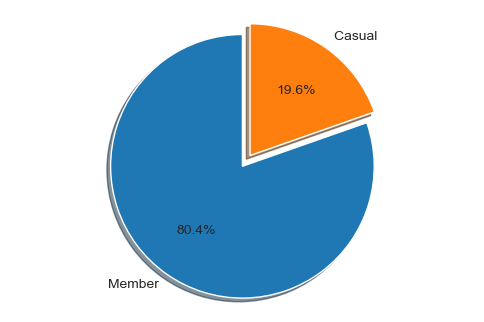

In [88]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Member', 'Casual ',
sizes = [2525330, 616920]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'White Wines')

fig1, ax1 = plt.subplots()
ax1.pie(sizes,explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [89]:
bike_temp=bike_copy.groupby(by='Weekday').count()
bike_temp.reset_index(inplace=True)
bike_temp['Weekday'] = bike_temp['Weekday'].map({0 : 'Mon', 1 : 'Tue', 2 : 'Wed', 3 : 'Thu',
4 : 'Fri', 5 : 'Sat', 6 : 'Sun'})

Text(0.5, 1.0, 'Totals on each day')

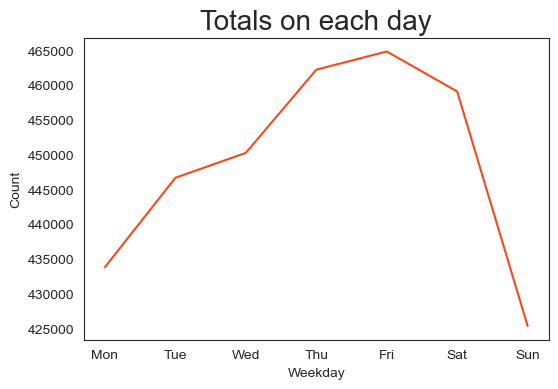

In [90]:
# Bar plot for the quality counts of red_wine
sns.lineplot(x=bike_temp['Weekday'], y=bike_temp['Duration'], sort=False,
legend=False,  color="xkcd:reddish orange")
plt.xlabel('Weekday')
plt.ylabel('Count')
sns.set_style("white")
plt.title("Totals on each day", fontsize=20)



<AxesSubplot:xlabel='Weekday', ylabel='Duration'>

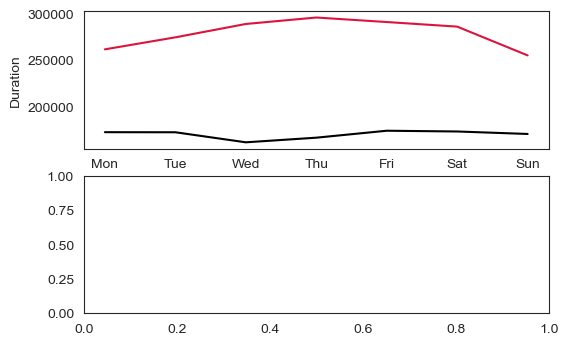

In [102]:
#from turtle import color

bike11_temp=bike11.groupby(by='Weekday').count()
bike11_temp.reset_index(inplace=True)
bike11_temp['Weekday'] = bike11_temp['Weekday'].map({0 : 'Mon', 1 : 'Tue', 2 : 'Wed', 3 : 'Thu',
4 : 'Fri', 5 : 'Sat', 6 : 'Sun'})

bike12_temp=bike12.groupby(by='Weekday').count()
bike12_temp.reset_index(inplace=True)
bike12_temp['Weekday'] = bike12_temp['Weekday'].map({0 : 'Mon', 1 : 'Tue', 2 : 'Wed', 3 : 'Thu',
4 : 'Fri', 5 : 'Sat', 6 : 'Sun'})

fig, ax = plt.subplots(2,1)
sns.lineplot(ax=ax[0], data=bike11_temp, x="Weekday", y="Duration", color="black")
sns.lineplot(ax=ax[0], data=bike12_temp, x="Weekday", y="Duration", color="crimson")


In [92]:
bike12

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,Year,Month,Day,Weekday
1188447,7.92,2012-01-01 00:04:00,2012-01-01 00:11:56,31245,7th & R St NW / Shaw Library,31109,7th & T St NW,W01412,Member,2012,1,1,6
1188448,19.37,2012-01-01 00:10:05,2012-01-01 00:29:28,31400,Georgia & New Hampshire Ave NW,31103,16th & Harvard St NW,W00524,Casual,2012,1,1,6
1188449,19.08,2012-01-01 00:10:23,2012-01-01 00:29:28,31400,Georgia & New Hampshire Ave NW,31103,16th & Harvard St NW,W00235,Member,2012,1,1,6
1188450,8.08,2012-01-01 00:15:41,2012-01-01 00:23:46,31101,14th & V St NW,31602,Park Rd & Holmead Pl NW,W00864,Member,2012,1,1,6
1188451,7.85,2012-01-01 00:15:42,2012-01-01 00:23:34,31102,11th & Kenyon St NW,31109,7th & T St NW,W00995,Member,2012,1,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3142245,143.83,2012-12-31 23:51:38,2013-01-01 02:15:29,31619,Lincoln Park / 13th & East Capitol St NE,31619,Lincoln Park / 13th & East Capitol St NE,W00704,Casual,2012,12,31,0
3142246,6.97,2012-12-31 23:56:19,2013-01-01 00:03:17,31101,14th & V St NW,31200,Massachusetts Ave & Dupont Circle NW,W00098,Member,2012,12,31,0
3142247,6.40,2012-12-31 23:56:35,2013-01-01 00:03:00,31101,14th & V St NW,31200,Massachusetts Ave & Dupont Circle NW,W01398,Member,2012,12,31,0
3142248,7.47,2012-12-31 23:58:20,2013-01-01 00:05:49,31613,Eastern Market Metro / Pennsylvania Ave & 7th ...,31607,14th & D St SE,W01301,Member,2012,12,31,0
